#**ArhamSheikh_APS1080_Assignment3**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1



<Figure size 1200x600 with 0 Axes>

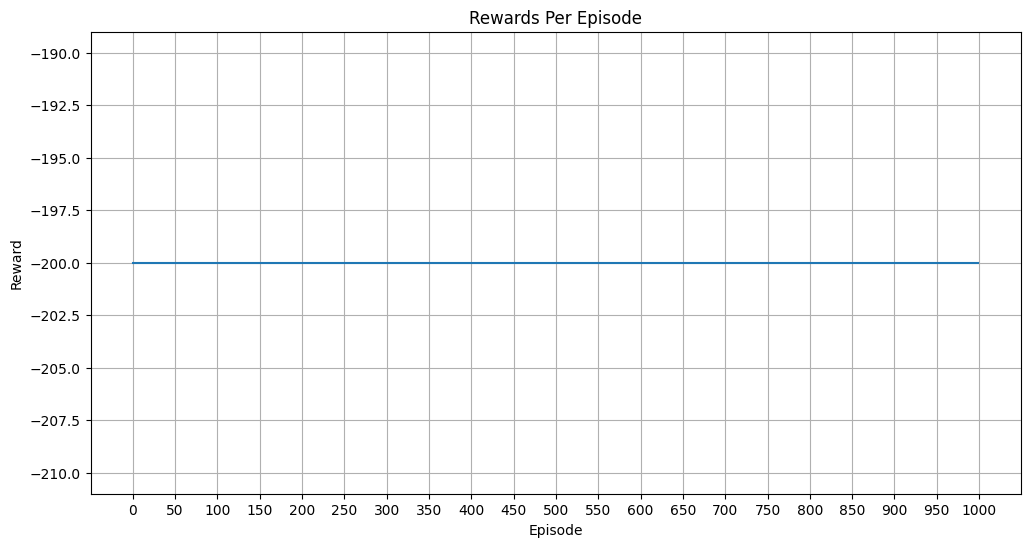


The episode with the most rewards is Episode 0 with a reward of -200.0


In [ ]:
def discretize_state(observation, bins):
    position, velocity = observation
    state = (np.clip(np.digitize(position, bins[0]), 0, len(bins[0]) - 1),
              np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1]) - 1))
    return state


env = gym.make("MountainCar-v0")
bins = [np.linspace(-1.2, 0.6, 20), np.linspace(-0.07, 0.07, 20)]

Q = np.random.rand(20, 20, env.action_space.n)
C = np.zeros((20, 20, env.action_space.n))
greedy_policy = np.zeros((20, 20), dtype=int)

gamma = 0.99
epsilon = 0.1
max_eps = 0
episode_rewards = []

while max_eps < 1000:
  observation = env.reset()
  state = discretize_state(observation, bins)
  episode_data = []
  total_reward = 0
  done = False

  while not done:
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = greedy_policy[state]

    new_obs, reward, done, _ = env.step(action)
    total_reward += reward
    new_state = discretize_state(new_obs, bins)
    episode_data.append((state, action, reward))
    state = new_state

  episode_rewards.append(total_reward)

  G = 0
  W = 1

  # Update Q-values and policy
  for t in reversed(range(len(episode_data))):
    state, action, reward = episode_data[t]
    G = gamma * G + reward
    C[state][action] += W
    Q[state][action] += W / C[state][action] * (G - Q[state][action])
    greedy_policy[state] = np.argmax(Q[state])

    if action != greedy_policy[state]:
        break

    W *= 1 / (epsilon / env.action_space.n + (1 - epsilon) * (action == greedy_policy[state]))

  max_eps += 1

  # if max_eps % 100 == 0:
  #    print(f"Episode {max_eps}, Total Reward: {total_reward}")

env.close()


plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.xticks(ticks=np.arange(0, episode + 1, 50))
plt.grid()
plt.title("Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

print(f"\nThe episode with the most rewards is Episode {np.argmax(episode_rewards)} with a reward of {episode_rewards[np.argmax(episode_rewards)]}")


# Task 1 - TD(0)


## On Policy Sarsa

Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -200.0
Episode 900 completed with a reward of -200.0
Episode 1000 completed with a reward of -200.0


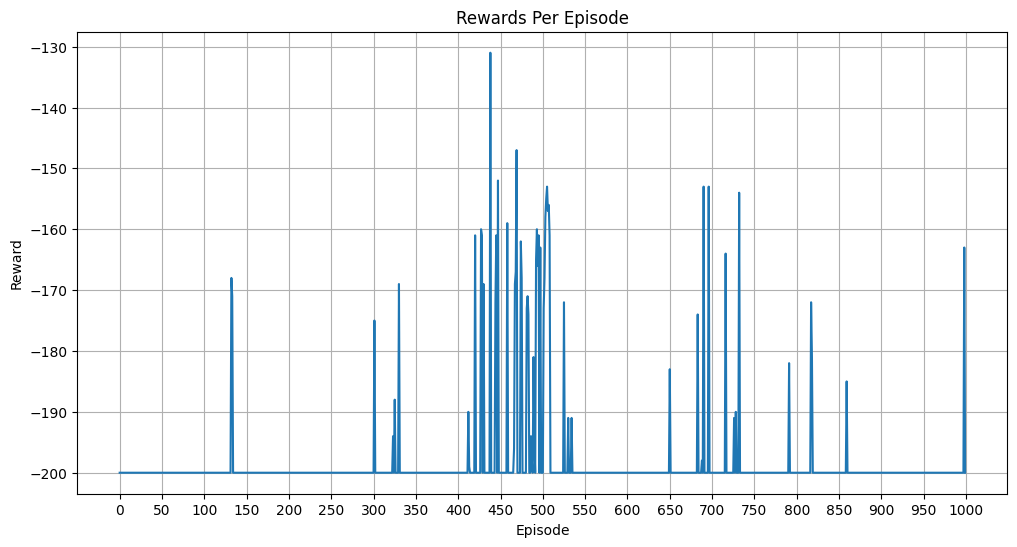


The episode with the most rewards is Episode 438 with a reward of -131.0


In [ ]:
env = gym.make('MountainCar-v0')

alpha = 0.3
epsilon = 0.1
gamma = 0.99
episode_rewards1 = []
episode = 0

def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)

bins = [np.linspace(-1.2, 0.6, 10), np.linspace(-0.07, 0.07, 10)]

Q = np.random.rand(len(bins[0]), len(bins[1]), env.action_space.n)

while episode < 1000:
  observation = env.reset()
  state = discretize_state(observation, bins)
  total_reward = 0
  done = False

  if np.random.uniform(0, 1) < epsilon:
      action = np.random.choice(env.action_space.n)
  else:
      action = np.argmax(Q[state])

  while not done:
      new_obs, reward, done, _ = env.step(action)
      next_state = discretize_state(new_obs, bins)

      if np.random.uniform(0, 1) < epsilon:
          next_action = np.random.choice(env.action_space.n)
      else:
          next_action = np.argmax(Q[next_state])


      Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
      state, action = next_state, next_action
      total_reward += reward

  episode += 1
  episode_rewards1.append(total_reward)

  if episode % 100 == 0:
    print(f"Episode {episode} completed with a reward of {total_reward}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards1)
plt.xticks(ticks=np.arange(0, episode + 1, 50))
plt.grid()
plt.title("Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

print(f"\nThe episode with the most rewards is Episode {np.argmax(episode_rewards1)} with a reward of {episode_rewards1[np.argmax(episode_rewards1)]}")

env.close()


## On Policy Expected Sarsa

Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -200.0
Episode 900 completed with a reward of -200.0
Episode 1000 completed with a reward of -200.0


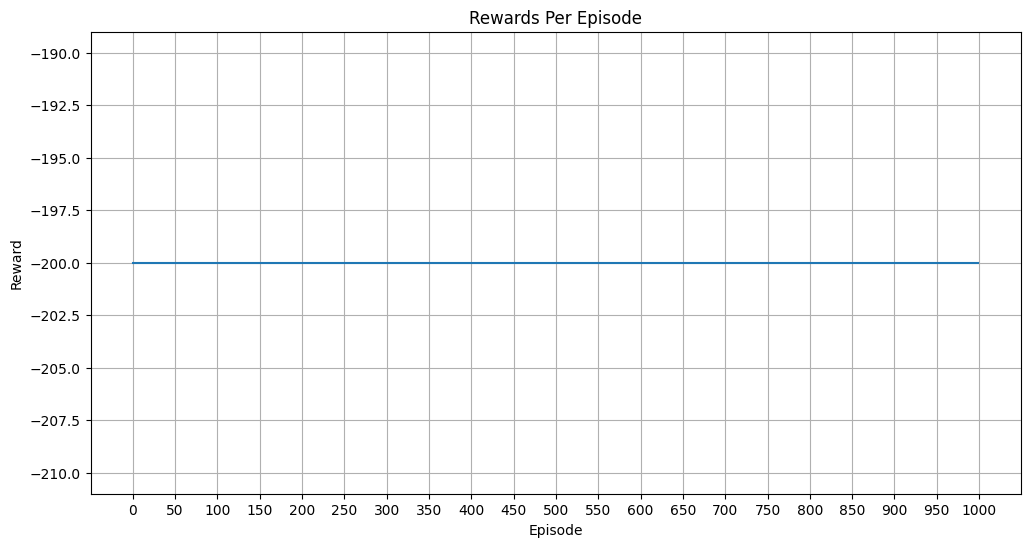


The episode with the most rewards is Episode 0 with a reward of -200.0


In [ ]:
env = gym.make('MountainCar-v0')

alpha = 0.3
epsilon = 0.1
gamma = 0.99
episode_rewards2 = []
episode = 0

def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)

bins = [np.linspace(-1.2, 0.6, 10), np.linspace(-0.07, 0.07, 10)]
Q = np.random.rand(len(bins[0]), len(bins[1]), env.action_space.n)

while episode < 1000:
  observation = env.reset()
  state = discretize_state(observation, bins)
  total_reward = 0
  done = False

  if np.random.uniform(0, 1) < epsilon:
      action = np.random.choice(env.action_space.n)
  else:
      action = np.argmax(Q[state])

  while not done:
    new_obs, reward, done, _ = env.step(action)
    next_state = discretize_state(new_obs, bins)
    expected_value = 0
    for a in range(env.action_space.n):
        prob = epsilon / env.action_space.n
        if a == np.argmax(Q[next_state]):
            prob += 1 - epsilon
        expected_value += prob * Q[next_state][a]


    Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])

    state, action = next_state, action
    total_reward += reward

  episode += 1
  episode_rewards2.append(total_reward)

  if episode % 100 == 0:
      print(f"Episode {episode} completed with a reward of {total_reward}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards2)
plt.xticks(ticks=np.arange(0, episode + 1, 50))
plt.grid()
plt.title("Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

print(f"\nThe episode with the most rewards is Episode {np.argmax(episode_rewards2)} with a reward of {episode_rewards2[np.argmax(episode_rewards2)]}")

env.close()


## Off Policy Expected Sarsa

Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -150.0
Episode 900 completed with a reward of -200.0
Episode 1000 completed with a reward of -200.0


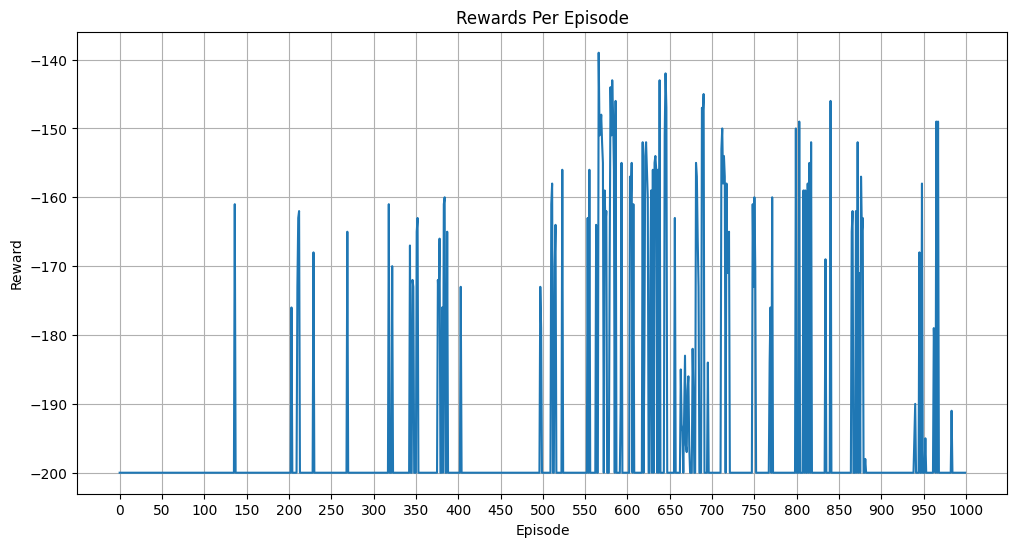


The episode with the most rewards is Episode 566 with a reward of -139.0


In [ ]:
env = gym.make('MountainCar-v0')

alpha = 0.1
epsilon = 0.1
gamma = 0.99
max_eps = 1000
episode_rewards3 = []
episode = 0

def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)

bins = [np.linspace(-1.2, 0.6, 10), np.linspace(-0.07, 0.07, 10)]

Q = np.random.rand(len(bins[0]), len(bins[1]), env.action_space.n)

while episode < max_eps:
    observation = env.reset()
    state = discretize_state(observation, bins)

    done = False
    total_reward = 0

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax(Q[state])

        next_obs, reward, done, _ = env.step(action)
        next_state = discretize_state(next_obs, bins)

        expected_value = 0
        for best_action in range(env.action_space.n):
            if best_action == np.argmax(Q[next_state]):
                expected_value += (1 - epsilon) * Q[next_state][best_action]
            else:
                expected_value += (epsilon / env.action_space.n) * Q[next_state][best_action]

        Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])
        state = next_state
        total_reward += reward

    episode += 1
    episode_rewards3.append(total_reward)

    if episode % 100 == 0:
        print(f"Episode {episode} completed with a reward of {total_reward}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards3)
plt.xticks(ticks=np.arange(0, max_eps + 1, 50))
plt.grid()
plt.title("Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

print(f"\nThe episode with the most rewards is Episode {np.argmax(episode_rewards3)} with a reward of {episode_rewards3[np.argmax(episode_rewards3)]}")
env.close()


         on-policy SARSA  on-policy expected SARSA  off-policy expected SARSA
Episode                                                                      
0                 -200.0                    -200.0                     -200.0
1                 -200.0                    -200.0                     -200.0
2                 -200.0                    -200.0                     -200.0
3                 -200.0                    -200.0                     -200.0
4                 -200.0                    -200.0                     -200.0
...                  ...                       ...                        ...
995               -200.0                    -200.0                     -200.0
996               -200.0                    -200.0                     -200.0
997               -200.0                    -200.0                     -200.0
998               -163.0                    -200.0                     -200.0
999               -200.0                    -200.0              

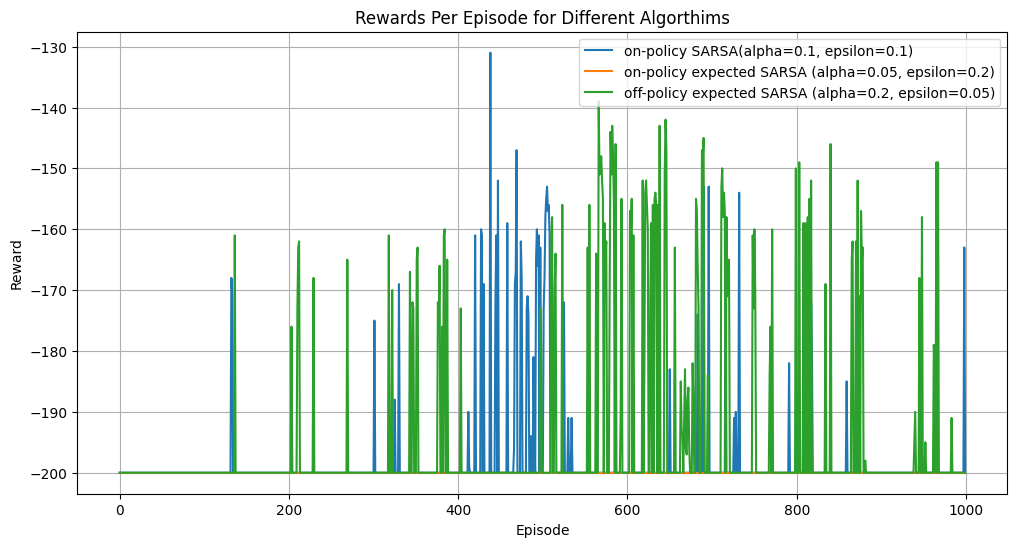

In [ ]:
import pandas as pd

data = {
    "on-policy SARSA": episode_rewards1,
    "on-policy expected SARSA": episode_rewards2,
    "off-policy expected SARSA": episode_rewards3
}


df = pd.DataFrame(data)
df.index.name = "Episode"

print(df)

plt.figure(figsize=(12, 6))
plt.plot(df['on-policy SARSA'], label='on-policy SARSA(alpha=0.1, epsilon=0.1)')
plt.plot(df['on-policy expected SARSA'], label='on-policy expected SARSA (alpha=0.05, epsilon=0.2)')
plt.plot(df['off-policy expected SARSA'], label='off-policy expected SARSA (alpha=0.2, epsilon=0.05)')

plt.title("Rewards Per Episode for Different Algorthims")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid()
plt.show()


In terms of the MountainCar Problem I was unable to find an algorthim that direclty solves the issue. After some research it turns out that RL algorithms do not solve this problem well, I did not attempt the recommened solutions as they were not taught in the class.

Moving foward, the on  Policy Expected Sarsa was unable to find the mountain top as the rewards for all the episodes maxed out at -200 as the simulation maxed out at 200 time steps wthout finding a solution. On Policy  Sarsa and Off Policy Expected Sarsa had a better time  or closer to finding the mountain top as they were able to capture rewards around -160 i.e they made it up 40 time steps closer to the top. Off Policy Expected Sarsa had more success as its learnign rate can be seen was larger and therefore faster with a lesser exploration rate so it chose the best action more of than not, compared to on Policy Sarsa.

# Task 2


## TD(2)

Episode 0 completed with a reward of -200.0
Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -200.0
Episode 900 completed with a reward of -200.0
Episode 999 completed with a reward of -200.0


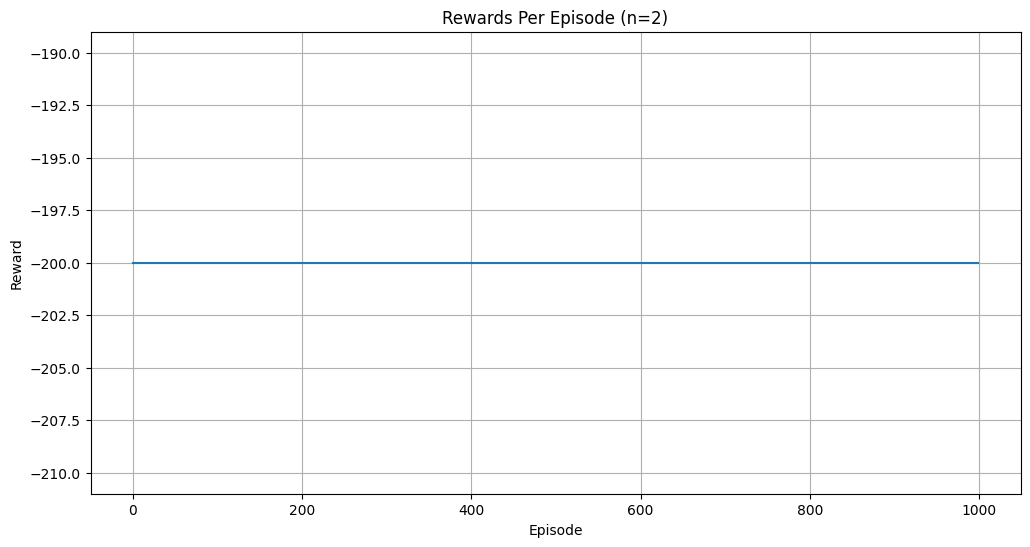

In [ ]:
def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)


bins = [np.linspace(-1.2, 0.6, 30), np.linspace(-0.07, 0.07, 30)]
env = gym.make('MountainCar-v0')
alpha = 0.9
epsilon = 0.1
max_eps = 1000
episode_rewards = []
n = 2

Q = np.zeros((len(bins[0]), len(bins[1]), env.action_space.n))

for episode in range(max_eps):
  observation = env.reset()
  state = discretize_state(observation, bins)
  T = float('inf')
  t = 0
  rewards = []
  states = []
  actions = []

  action = np.argmax(Q[state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
  actions.append(action)

  while True:
    if t < T:
      next_obs, reward, done, _ = env.step(action)
      next_state = discretize_state(next_obs, bins)
      rewards.append(reward)
      states.append(state)

      if done:
          T = t + 1
      else:
          action = np.argmax(Q[next_state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
          actions.append(action)

      state = next_state

    for tau in range(max(0, t - n + 1), t + 1):
      G = sum(rewards[i] for i in range(tau + 1, min(tau + n, len(rewards))))
      if tau + n < len(rewards):
          G += Q[states[tau + n]][actions[tau + n]]

      Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

    if t == T - 1:
        break

    t += 1

  episode_rewards.append(sum(rewards))

  if episode % 100 == 0 or episode == max_eps - 1:
    print(f"Episode {episode} completed with a reward of {sum(rewards)}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.title("Rewards Per Episode (n=2)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

env.close()


## TD(3)

Episode 0 completed with a reward of -200.0
Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -200.0
Episode 900 completed with a reward of -200.0
Episode 999 completed with a reward of -200.0


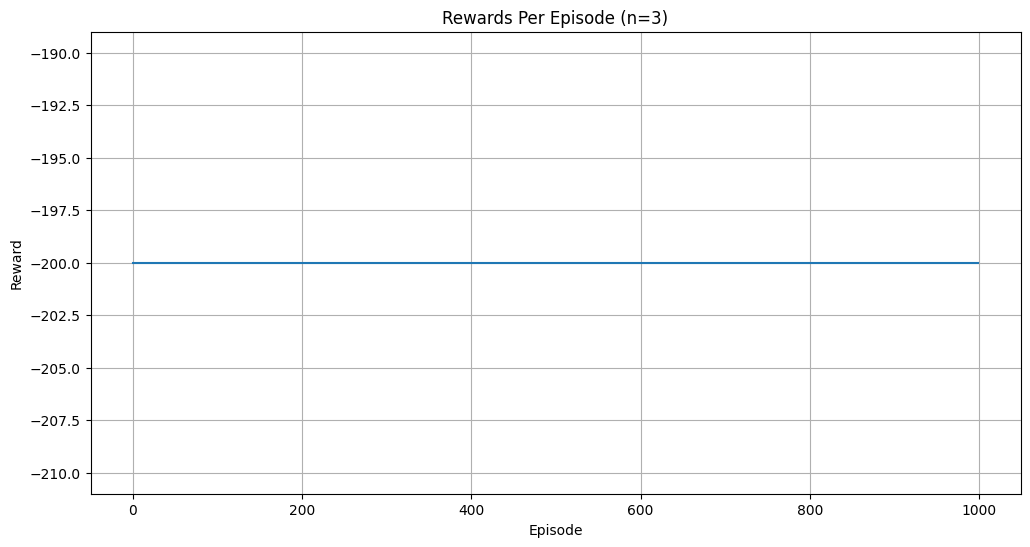

In [ ]:
def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)


bins = [np.linspace(-1.2, 0.6, 10), np.linspace(-0.07, 0.07, 10)]

env = gym.make('MountainCar-v0')
alpha = 0.1
epsilon = 0.1
max_eps = 1000
episode_rewards = []
n = 3

Q = np.zeros((len(bins[0]), len(bins[1]), env.action_space.n))

for episode in range(max_eps):
  observation = env.reset()
  state = discretize_state(observation, bins)
  T = float('inf')
  t = 0
  rewards = []
  states = []
  actions = []

  action = np.argmax(Q[state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
  actions.append(action)

  while True:
    if t < T:
      next_obs, reward, done, _ = env.step(action)
      next_state = discretize_state(next_obs, bins)
      rewards.append(reward)
      states.append(state)

      if done:
        T = t + 1
      else:
        action = np.argmax(Q[next_state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
        actions.append(action)

      state = next_state

      for tau in range(max(0, t - n + 1), t + 1):
        G = sum(rewards[i] for i in range(tau + 1, min(tau + n, len(rewards))))
        if tau + n < len(rewards):
          G += Q[states[tau + n]][actions[tau + n]]

        Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

      if t == T - 1:
          break
      t += 1

  episode_rewards.append(sum(rewards))

  if episode % 100 == 0 or episode == max_eps - 1:
      print(f"Episode {episode} completed with a reward of {sum(rewards)}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.title("Rewards Per Episode (n=3)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

print(f"\nThe episode with the most rewards is Episode {np.argmax(episode_rewards)} with a reward of {episode_rewards[np.argmax(episode_rewards)]}")


env.close()


## TD(4)

Episode 0 completed with a reward of -200.0
Episode 100 completed with a reward of -200.0
Episode 200 completed with a reward of -200.0
Episode 300 completed with a reward of -200.0
Episode 400 completed with a reward of -200.0
Episode 500 completed with a reward of -200.0
Episode 600 completed with a reward of -200.0
Episode 700 completed with a reward of -200.0
Episode 800 completed with a reward of -200.0
Episode 900 completed with a reward of -200.0
Episode 999 completed with a reward of -200.0


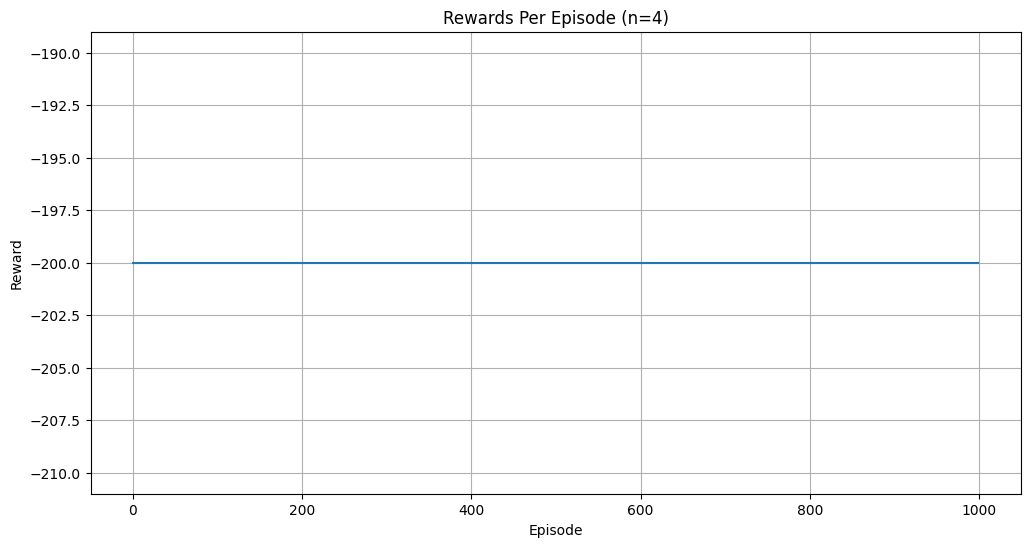

In [ ]:
def discretize_state(observation, bins):
    position, velocity = observation
    position_bin = np.clip(np.digitize(position, bins[0]), 0, len(bins[0])-1)
    velocity_bin = np.clip(np.digitize(velocity, bins[1]), 0, len(bins[1])-1)
    return (position_bin, velocity_bin)


bins = [np.linspace(-1.2, 0.6, 10), np.linspace(-0.07, 0.07, 10)]

env = gym.make('MountainCar-v0')


alpha = 0.1
epsilon = 0.1
max_eps = 1000
episode_rewards = []
n = 4

Q = np.zeros((len(bins[0]), len(bins[1]), env.action_space.n))


for episode in range(max_eps):
  observation = env.reset()
  state = discretize_state(observation, bins)
  T = float('inf')
  t = 0
  rewards = []
  states = []
  actions = []

  action = np.argmax(Q[state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
  actions.append(action)

  while True:
      if t < T:
        next_obs, reward, done, _ = env.step(action)
        next_state = discretize_state(next_obs, bins)
        rewards.append(reward)
        states.append(state)

        if done:
          T = t + 1
        else:
          action = np.argmax(Q[next_state]) if np.random.uniform(0, 1) > epsilon else env.action_space.sample()
          actions.append(action)

        state = next_state

      for tau in range(max(0, t - n + 1), t + 1):
        G = sum(rewards[i] for i in range(tau + 1, min(tau + n, len(rewards))))
        if tau + n < len(rewards):
            G += Q[states[tau + n]][actions[tau + n]]

        Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

      if t == T - 1:
          break
      t += 1

  episode_rewards.append(sum(rewards))

  if episode % 100 == 0 or episode == max_eps - 1:
      print(f"Episode {episode} completed with a reward of {sum(rewards)}")

plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.title("Rewards Per Episode (n=4)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

env.close()


As it can be seen that I was unable to find a proper solution at all to find the algorithim to solve the Mountain Car problem, theoretically the TD(2), TD(3) and TD(4) algorithims would be able to find the optimal policy at a faster rate with bootstrapping every 2,3 and 4 steps. Theoretically, the rewards for all three should also be higher. TD(4) should converge the fastest compared to TD(3), TD(2) and TD(0) as it updates its policy every 4 time steps, and should learn the most optimal policy, however may not explore as much as to the rest.